# Scalar Couplings Distributions

The objective of this notebook is to explore the difference between coupling types in terms of the value of the scalar coupling constant.

## Conclusions

The main conclusions of this notebook are:
+ 1J couplings have a distribution that does not overlap with the other coupling types.
+ 2J and 3J have overlapping coupling value distributions. An additional feature is required to set apart 2J and 3J couplings
+ The atom types in the coupling have different distribution shapes, but similar coupling value ranges.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context("poster")

In [2]:
train_data_path = './data/champs-scalar-coupling/train.csv'
test_data_path = './data/champs-scalar-coupling/test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

## Coupling Types

There are the same 8 coupling types in the train and test datasets.

The coupling notation holds information about the atoms involved in the coupling and how many bonds are between the atoms:

$$^{n}JXY$$

+ $n$ is the number of bonds between the atoms
+ $X$ is the chemical symbol of the first coupled atom
+ $Z$ is the chemical symbol of the second coupled atom

For example, to denote the J-coupling between 2 Hydrogen atoms separated by two bonds I would use the notation:

$$^{2}JHH$$

In [3]:
sorted(train_df.type.unique())

['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']

In [4]:
sorted(test_df.type.unique())

['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']

## Couplings Distributions by Bond Distance

A distinction that can be made between coupling types is the number of bonds between two coupled atoms. The coupling should be stronger for atoms with less bonds between them.

In [5]:
J1_df = train_df[train_df.type.str.startswith('1')]
J2_df = train_df[train_df.type.str.startswith('2')]
J3_df = train_df[train_df.type.str.startswith('3')]

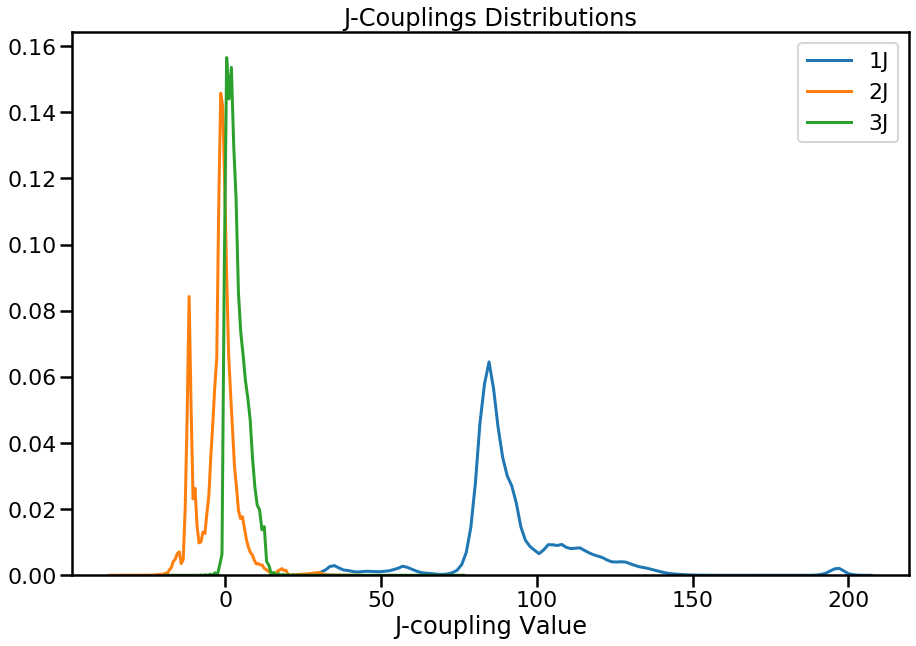

In [6]:
plt.figure(figsize=(15, 10))

sns.kdeplot(J1_df.scalar_coupling_constant, label='1J')
sns.kdeplot(J2_df.scalar_coupling_constant, label='2J')
sns.kdeplot(J3_df.scalar_coupling_constant, label='3J')
plt.xlabel('J-coupling Value')
plt.title('J-Couplings Distributions');


## Coupling Distributions by Atom Type

In [7]:
HC_df = train_df[train_df.type.str.endswith('HC')]
HN_df = train_df[train_df.type.str.endswith('HN')]
HH_df = train_df[train_df.type.str.endswith('HH')]

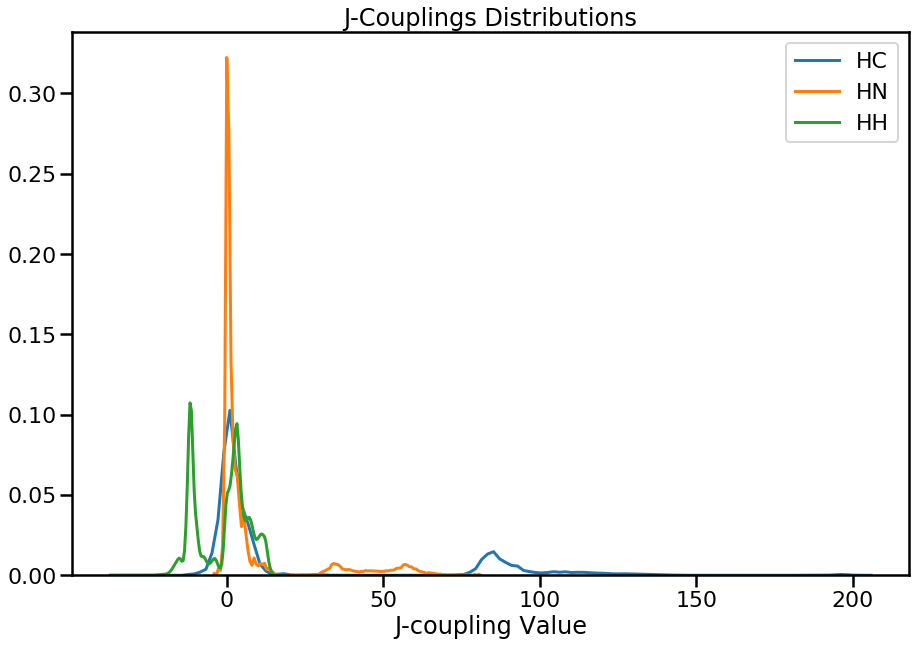

In [8]:
plt.figure(figsize=(15, 10))

sns.kdeplot(HC_df.scalar_coupling_constant, label='HC')
sns.kdeplot(HN_df.scalar_coupling_constant, label='HN')
sns.kdeplot(HH_df.scalar_coupling_constant, label='HH')
plt.xlabel('J-coupling Value')
plt.title('J-Couplings Distributions');
